<a href="https://colab.research.google.com/github/datsukai/capstonec964/blob/main/Neilson%2C_Melissa_Board_Game_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Board Game Suggestion Program

In [ ]:
#@title Importing Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, BallTree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np

In [ ]:
#@title Setting up dataframes for rest of program
df = pd.read_csv('https://raw.githubusercontent.com/datsukai/capstonec964/main/bg_dataset.csv')
df.drop(['bgg_url','image_url','max_players', 'max_time','year','min_players','min_time','avg_time','designer','weight','mechanic'], axis=1, inplace=True)
cat_df = df[['names','category']].copy()
name_df = df[['names', 'game_id']].copy()
df2 = df[['game_id','avg_rating']]
cats = df['category'].str.get_dummies(sep=', ')
df2 = pd.concat([df, cats],  axis=1)
df2.drop(['names', 'category'],axis=1, inplace=True)
rating_df = df[['names','avg_rating']].copy()
df2.set_index('game_id',inplace=True)


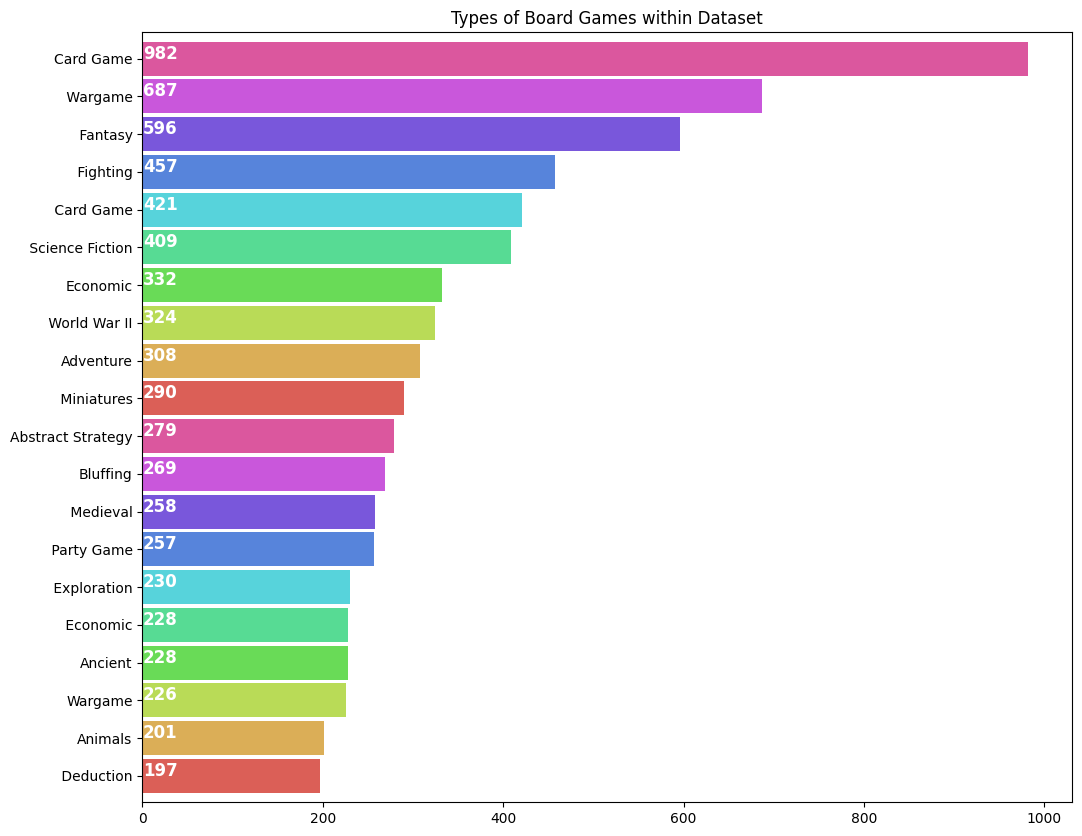

In [ ]:
#@title Barplot graph to show Top 20 categories of Board Games

plot = cat_df['category'].str.strip('[]').str.replace(' ','').str.replace("''",'')
plot['category'] = cat_df['category'].str.split(',')

plt.subplots(figsize=(12,10))
list = []

for i in plot['category']:
    list.extend(i)
valuePD = pd.Series(list).value_counts()[:20].sort_values(ascending=True)

ax = valuePD.plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(valuePD.values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Types of Board Games within Dataset')
plt.show()


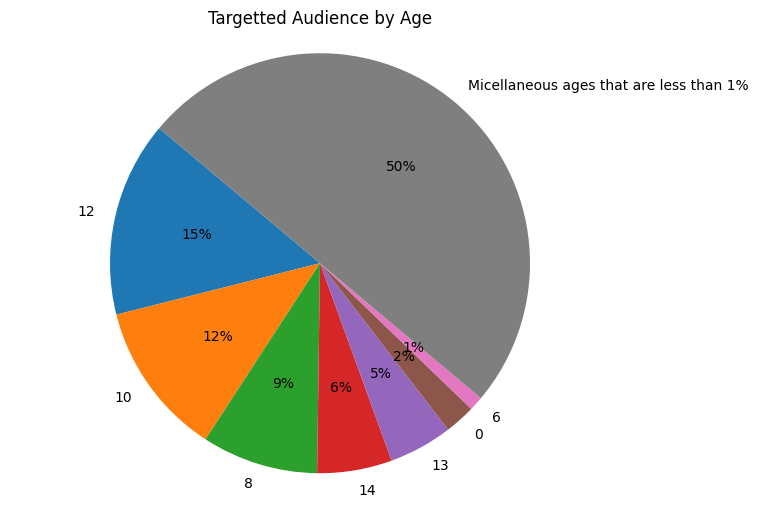

In [ ]:
#@title Pie graph to show Targetted Audience by Age
pieplot_count = df['age'].value_counts()
total_count = pieplot_count.sum()
percent = ( pieplot_count / total_count ) * 100
misc_threshold = 2
misc_mask = percent < misc_threshold

misc_count =  percent[~misc_mask].sum()
percent_misc = percent[~misc_mask]
percent_misc['Micellaneous ages that are less than 1%'] = misc_count

plt.figure(figsize=(8,6))
plt.pie(percent_misc, labels=percent_misc.index, autopct='%1.f%%',startangle=140)
plt.title('Targetted Audience by Age')
plt.axis('equal')
plt.show()

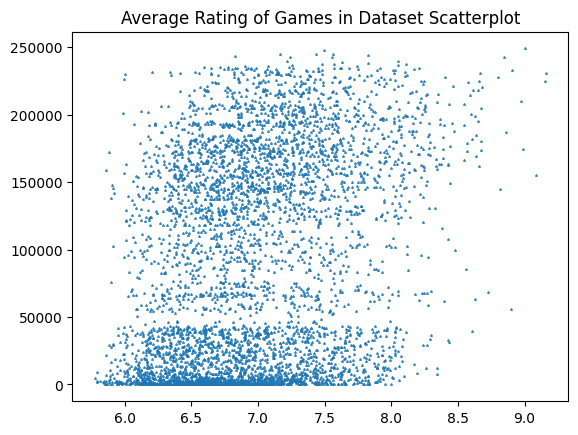

In [ ]:
#@title Scatterplot cluster showing game_ID # and their associated and avg_rating

x_scatter = df['avg_rating']
y_scatter = df['game_id']

plt.scatter(x_scatter, y_scatter, s=1, marker='^')
plt.title('Average Rating of Games in Dataset Scatterplot')
plt.show()

In [ ]:
#@title Train/Test Split with Accuracy Indicator
data = df2.values
X, y = data[:,:-1], data[:,-1]

print("X Shape",X.shape, "Y Shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)
print("X Train Shape", X_train.shape, "X Test Shape", X_test.shape, "Y Train Shape", y_train.shape,  "Y Test Shape", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree')
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
#How to make Accuracy Score show percentage look that up
print("Accuracy", ("{:.0%}".format(accuracy_score(y_test, y_predict))))

X Shape (4999, 89) Y Shape (4999,)
X Train Shape (3749, 89) X Test Shape (1250, 89) Y Train Shape (3749,) Y Test Shape (1250,)
Accuracy 99%


In [ ]:
#@title Setting up KNeighborClassifier and Functions for program
m, n = data[:,:-1], data[:,-1]

model_knn = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree')
model_knn.fit(m,n)

testNames = sorted(zip(name_df["names"], name_df["game_id"]))
dropdown = widgets.Dropdown(options=testNames, text='Select Name of Board Game', description='Name', disabled=False)

def get_avgrating(data, name):
    try:
       return data.loc[data['names'] == name, 'avg_rating'].values[0]
    except IndexError:
       return None


def bg_chosen(change):
    global selected_value
    selected_value = change.new
    global foundName
    foundName = None

    for name, game_ID in zip(name_df["names"],  name_df["game_id"]):
        if game_ID == selected_value:
            foundName = name
            break
    if foundName is None:
        print("Index {} is not found in list.".format(selected_value))
        return

    print('\nSelected board game is {0}, Game ID #{1}\n'.format(foundName,selected_value))


    game_index = name_df[name_df['game_id'] == selected_value].index[0]

    indices = knn.kneighbors([X[game_index]])[1][0]

    print('Recommendation for {0} which has an average rating of {1} \n'.format(foundName, round(get_avgrating(rating_df, foundName),3)))
    for i, index in enumerate(indices):
      if i == 0:
          continue
      neighbor_name = name_df.iloc[index]['names']
      similarity_score = knn.kneighbors([X[game_index]])[0][0][i]
      print('{0}: {1}, with a similarity score of {2} and average rating of {3}'.format(i, neighbor_name, round(similarity_score), round(get_avgrating(rating_df, neighbor_name),3)))


In [ ]:
#@title Select Board Game from Drop Down Menu

dropdown.observe(bg_chosen, names='value')
print(f"Select Board Game:")
display(dropdown)

Select Board Game:


Dropdown(description='Name', index=872, options=(('...and then, we held hands.', 153999), ('...und tschüss!', …


Selected board game is Der wahre Walter, Game ID #8939

Recommendation for Der wahre Walter which has an average rating of 7.206 

1: Torres, with a similarity score of 50 and average rating of 7.167
2: Summoner Wars: Guild Dwarves vs Cave Goblins, with a similarity score of 52 and average rating of 7.616
3: Zany Penguins, with a similarity score of 58 and average rating of 6.741
4: Star Trek Deck Building Game: The Next Generation – Next Phase, with a similarity score of 59 and average rating of 6.796
5: Clue Master Detective, with a similarity score of 60 and average rating of 6.598

Selected board game is Exit: The Game – The Forbidden Castle, Game ID #215840

Recommendation for Exit: The Game – The Forbidden Castle which has an average rating of 7.089 

1: Through the Ages: A New Story of Civilization, with a similarity score of 115 and average rating of 8.607
2: Legacy of Dragonholt, with a similarity score of 183 and average rating of 7.624
3: Urbania, with a similarity score of